In [12]:
from zipfile import ZipFile
import os

# Path to the uploaded zip file
zip_path = 'data/ISOT Fake News Dataset.zip'

# Directory to extract the contents of the Dataset
extract_dir = 'data/ISOT_Fake_News_Dataset'

# Created a directory for extracted files
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the files in the directory
extracted_files = os.listdir(extract_dir)
extracted_files


['ISOT Fake News Dataset']

In [13]:
# Path to the extracted dataset folder
dataset_folder = os.path.join(extract_dir, 'ISOT Fake News Dataset')

# Listing the files in the dataset folder
dataset_files = os.listdir(dataset_folder)
dataset_files


['test.csv', 'train.csv']

In [14]:
import pandas as pd

# Loading the train and test CSV files
train_df = pd.read_csv(os.path.join(dataset_folder, 'train.csv'))
test_df = pd.read_csv(os.path.join(dataset_folder, 'test.csv'))

# Displaying the first few rows of the train and test datasets
train_head = train_df.head()
test_head = test_df.head()

# Displaying the structure of the datasets
train_info = train_df.info()
test_info = test_df.info()

train_head, test_head, train_info, test_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36532 entries, 0 to 36531
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text;label  36532 non-null  object
dtypes: object(1)
memory usage: 285.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8854 entries, 0 to 8853
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text;label  8854 non-null   object
dtypes: object(1)
memory usage: 69.3+ KB


(                                          text;label
 0  republican committee pass bill would prohibit ...
 1  trump treasury candidate bank accuse discrimin...
 2  guess behind sicken ad show boy bully dad vote...
 3  michigan treasurer call quick action detroit s...
 4  clinton urge renew fight value washington reut...,
                                           text;label
 0  canada send troop u border deal illegals asylu...
 1  mother yr old charge endangerment allow child ...
 2  report donald trump lie donate charity donate ...
 3  pentagon request deny video arm citizen defend...
 4  watch sean hannity destroy obama economic poli...,
 None,
 None)

In [15]:
# Spliting the 'text;label' column into two separate columns for both train and test datasets
train_df[['text', 'label']] = train_df['text;label'].str.split(';', expand=True)
test_df[['text', 'label']] = test_df['text;label'].str.split(';', expand=True)

# Droping the original 'text;label' column
train_df.drop(columns=['text;label'], inplace=True)
test_df.drop(columns=['text;label'], inplace=True)

# Displaying the first few rows and info of the modified train and test datasets
train_head_mod = train_df.head()
test_head_mod = test_df.head()
train_info_mod = train_df.info()
test_info_mod = test_df.info()

train_head_mod, test_head_mod, train_info_mod, test_info_mod


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36532 entries, 0 to 36531
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    36532 non-null  object
 1   label   36532 non-null  object
dtypes: object(2)
memory usage: 570.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8854 entries, 0 to 8853
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8854 non-null   object
 1   label   8854 non-null   object
dtypes: object(2)
memory usage: 138.5+ KB


(                                                text label
 0  republican committee pass bill would prohibit ...     0
 1  trump treasury candidate bank accuse discrimin...     1
 2  guess behind sicken ad show boy bully dad vote...     0
 3  michigan treasurer call quick action detroit s...     1
 4  clinton urge renew fight value washington reut...     1,
                                                 text label
 0  canada send troop u border deal illegals asylu...     0
 1  mother yr old charge endangerment allow child ...     0
 2  report donald trump lie donate charity donate ...     0
 3  pentagon request deny video arm citizen defend...     0
 4  watch sean hannity destroy obama economic poli...     0,
 None,
 None)

In [16]:
# Displaying the distribution of labels in both the training and testing datasets
label_distribution_train = train_df['label'].value_counts()
label_distribution_test = test_df['label'].value_counts()

# Displaying a few text samples to check for cleaning needs
text_samples_train = train_df['text'].sample(5, random_state=1).tolist()
text_samples_test = test_df['text'].sample(5, random_state=1).tolist()

label_distribution_train, label_distribution_test, text_samples_train, text_samples_test


(label
 0    18266
 1    18266
 Name: count, dtype: int64,
 label
 0    4585
 1    4269
 Name: count, dtype: int64,
 ['u military say order yet create safe area refugees washington reuters u military say yet order establish secretary state rex tillerson wednesday call interim zone stability help refugee return home campaign islamic state advance receive direction yet establish type zone colonel joe scrocca tell pentagon reporter speak phone kuwait ask tillerson remark',
  'ted cruz say church sound like sharia law america video presidential candidate senator ted cruz rtx visit south carolina church sunday message broadcast several house worship make argument government base principle religious far right rather american constitutionechoing middle eastern extremist believe law god trump exist law cruz tell crowd want hear candidate like would take americacruz avow evangelical make case front pack house nearly churchgoershis sermon title faith action press range conservative hot button re

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Data cleaning function
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Applying cleaning function to both train and test data
train_df['text'] = train_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)

# Initializing TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Limit to 10,000 features to manage memory and processing

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text'])
y_train = train_df['label'].astype(int)

# Transforming the test data
X_test_tfidf = tfidf_vectorizer.transform(test_df['text'])
y_test = test_df['label'].astype(int)

# Spliting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((29225, 10000), (7307, 10000), (29225,), (7307,))

In [44]:
import time
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Initializing the Linear Support Vector Classifier
linear_svc = LinearSVC(random_state=0)


start_time_train = time.time()

# Training the model on the training data
linear_svc.fit(X_train, y_train)

# Calculate training time
training_time = time.time() - start_time_train

# Start timing for prediction
start_time_pred = time.time()

# Predict on the validation set
y_val_pred_svc = linear_svc.predict(X_val)

# Calculate prediction time
prediction_time = time.time() - start_time_pred

# Calculating and print accuracy and other metrics
accuracy_svc = accuracy_score(y_val, y_val_pred_svc)
report_svc = classification_report(y_val, y_val_pred_svc, target_names=['Fake', 'Real'])

print("Linear SVC Metrics:")
print("Accuracy:", accuracy_svc)
print(report_svc)
print("Training Time: {:.4f} seconds".format(training_time))
print("Prediction Time: {:.4f} seconds".format(prediction_time))


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVC Metrics:
Accuracy: 0.992062405912139
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      3690
        Real       0.99      0.99      0.99      3617

    accuracy                           0.99      7307
   macro avg       0.99      0.99      0.99      7307
weighted avg       0.99      0.99      0.99      7307

Training Time: 0.5063 seconds
Prediction Time: 0.0045 seconds


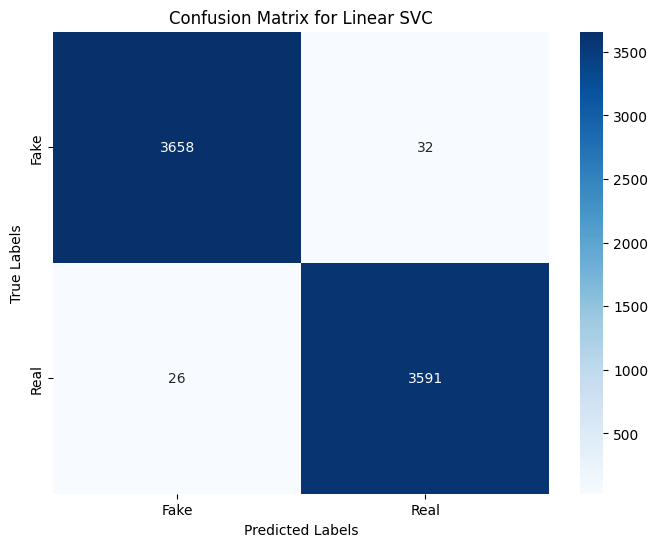

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns 

# Confusion matrix for Linear SVC
cm_svc = confusion_matrix(y_val, y_val_pred_svc)

# Plotting the confusion matrix using seaborn 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix for Linear SVC')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [43]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initializing the Logistic Regression model
log_reg = LogisticRegression(random_state=0, max_iter=1000)

# Start timing for training
start_time_train = time.time()

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Calculate training time
training_time = time.time() - start_time_train

# Start timing for prediction
start_time_pred = time.time()

# Predict on the validation set
y_val_pred_lr = log_reg.predict(X_val)

# Calculate prediction time
prediction_time = time.time() - start_time_pred

# Calculate and print accuracy and other metrics
accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
report_lr = classification_report(y_val, y_val_pred_lr, target_names=['Fake', 'Real'])

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_lr)
print(report_lr)
print("Training Time: {:.4f} seconds".format(training_time))
print("Prediction Time: {:.4f} seconds".format(prediction_time))


Logistic Regression Metrics:
Accuracy: 0.983714246612837
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98      3690
        Real       0.98      0.99      0.98      3617

    accuracy                           0.98      7307
   macro avg       0.98      0.98      0.98      7307
weighted avg       0.98      0.98      0.98      7307

Training Time: 1.0403 seconds
Prediction Time: 0.0534 seconds


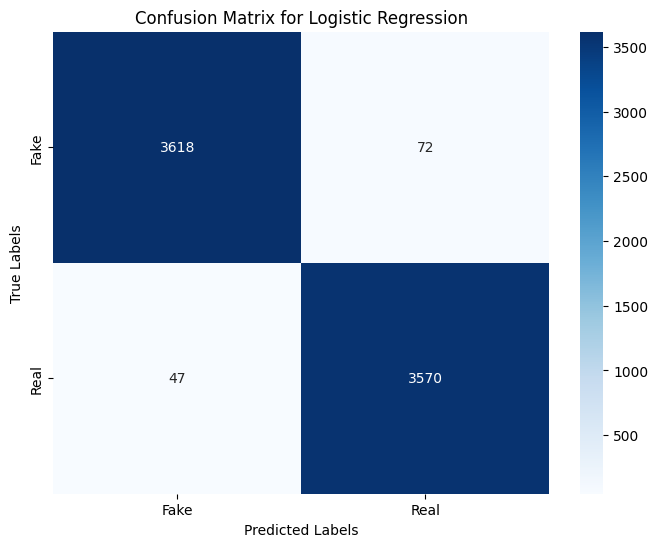

In [46]:
# Compute the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_val, y_val_pred_lr)

# Plotting the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [47]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Converting the sparse TF-IDF vectors to dense format 
X_train_dense = X_train.toarray()
X_val_dense = X_val.toarray()

# Converting labels to categorical
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

# Building the MLP model
mlp_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_dense.shape[1],)),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Start timing for training
start_time_train = time.time()

# Train the model
mlp_model.fit(X_train_dense, y_train_cat, epochs=3, batch_size=64, verbose=1)

# Calculate training time
training_time = time.time() - start_time_train

# Start timing for prediction
start_time_pred = time.time()

# Evaluating
loss, accuracy_mlp = mlp_model.evaluate(X_val_dense, y_val_cat, verbose=0)

# Predict the labels
predictions_mlp = mlp_model.predict(X_val_dense)
y_val_pred_mlp = np.argmax(predictions_mlp, axis=1)

# Calculation  of prediction time
prediction_time = time.time() - start_time_pred

# Print metrics
report_mlp = classification_report(y_val, y_val_pred_mlp, target_names=['Fake', 'Real'])
print("MLP Neural Network Metrics:")
print("Accuracy:", accuracy_mlp)
print(report_mlp)
print("Training Time: {:.4f} seconds".format(training_time))
print("Prediction Time: {:.4f} seconds".format(prediction_time))


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
457/457 ━━━━━━━━━━━━━━━━━━━━ 52s 106ms/step - accuracy: 0.9449 - loss: 0.1514
Epoch 2/3
457/457 ━━━━━━━━━━━━━━━━━━━━ 47s 102ms/step - accuracy: 0.9982 - loss: 0.0060
Epoch 3/3
457/457 ━━━━━━━━━━━━━━━━━━━━ 56s 122ms/step - accuracy: 0.9992 - loss: 0.0032
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
MLP Neural Network Metrics:
Accuracy: 0.9852196574211121
              precision    recall  f1-score   support

        Fake       0.98      0.99      0.99      3690
        Real       0.99      0.98      0.98      3617

    accuracy                           0.99      7307
   macro avg       0.99      0.99      0.99      7307
weighted avg       0.99      0.99      0.99      7307

Training Time: 175.8318 seconds
Prediction Time: 6.7042 seconds


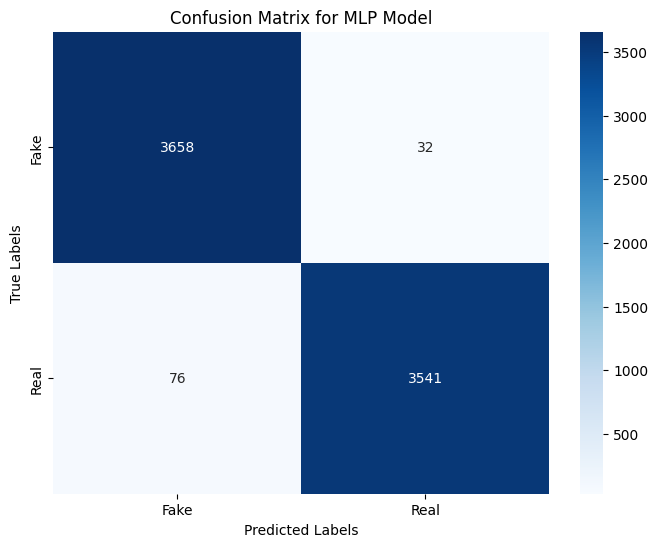

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Computing matrix
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)

# Plotting the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix for MLP Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['text'])
X_seq = tokenizer.texts_to_sequences(train_df['text'])
X_pad = pad_sequences(X_seq, maxlen=500)

# Preparing categorical labels
y_cat = to_categorical(train_df['label'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pad, y_cat, test_size=0.2, random_state=42)


In [22]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense
from sklearn.metrics import classification_report, accuracy_score

# Build the CNN model
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=100, input_shape=(500,)),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
cnn_model.fit(X_train, y_train, epochs=3, batch_size=64, verbose=0)
training_time = time.time() - start_time

# Evaluate the model on the validation data
loss, accuracy_cnn = cnn_model.evaluate(X_val, y_val, verbose=0)
predictions_cnn = cnn_model.predict(X_val)
y_val_pred_cnn = predictions_cnn.argmax(axis=-1)

# Converting categorical labels back to label encoder for classification report
y_val_true = y_val.argmax(axis=-1)

# Print metrics
report_cnn = classification_report(y_val_true, y_val_pred_cnn, target_names=['Fake', 'Real'])
print("CNN Metrics:")
print("Accuracy:", accuracy_cnn)
print(report_cnn)
print("Training Time: {:.2f} seconds".format(training_time))


229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step
CNN Metrics:
Accuracy: 0.9964417815208435
              precision    recall  f1-score   support

        Fake       0.99      1.00      1.00      3690
        Real       1.00      0.99      1.00      3617

    accuracy                           1.00      7307
   macro avg       1.00      1.00      1.00      7307
weighted avg       1.00      1.00      1.00      7307

Training Time: 346.87 seconds


In [23]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense
from sklearn.metrics import classification_report, accuracy_score

# Build the CNN model
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=100, input_shape=(500,)),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
cnn_model.fit(X_train, y_train, epochs=3, batch_size=64, verbose=0)
training_time = time.time() - start_time

# Evaluate the model on the validation data
loss, accuracy_cnn = cnn_model.evaluate(X_val, y_val, verbose=0)
predictions_cnn = cnn_model.predict(X_val)
y_val_pred_cnn = predictions_cnn.argmax(axis=-1)

# Convert categorical labels back to label encoder for classification report
y_val_true = y_val.argmax(axis=-1)

# Print metrics
report_cnn = classification_report(y_val_true, y_val_pred_cnn, target_names=['Fake', 'Real'])
print("CNN Metrics:")
print("Accuracy:", accuracy_cnn)
print(report_cnn)
print("Training Time: {:.2f} seconds".format(training_time))

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step
CNN Metrics:
Accuracy: 0.9960312247276306
              precision    recall  f1-score   support

        Fake       0.99      1.00      1.00      3690
        Real       1.00      0.99      1.00      3617

    accuracy                           1.00      7307
   macro avg       1.00      1.00      1.00      7307
weighted avg       1.00      1.00      1.00      7307

Training Time: 352.83 seconds


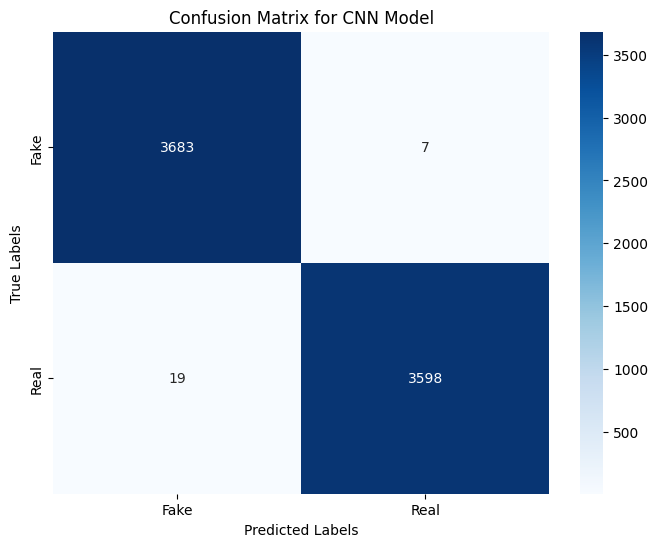

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  
# Compute the confusion matrix
cm = confusion_matrix(y_val_true, y_val_pred_cnn)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix for CNN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# COMPARATIVE ANALYSIS: 

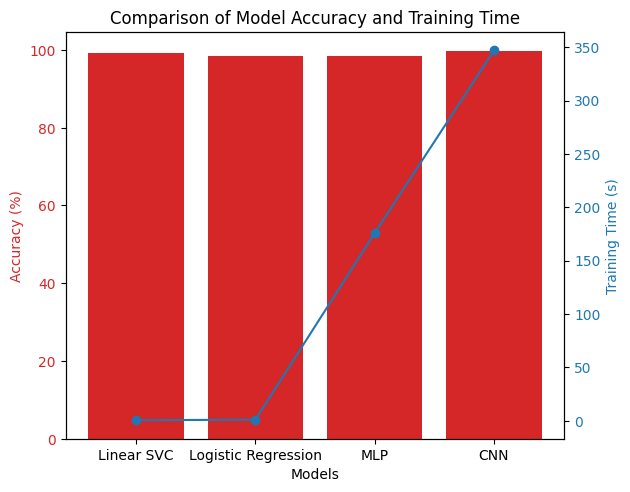

In [103]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Linear SVC', 'Logistic Regression', 'MLP', 'CNN']
accuracies = [99.21, 98.37, 98.52, 99.64]  # Accuracy percentages
training_times = [0.51, 1.04, 175.83, 346.87]  # Training times in seconds

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.bar(models, accuracies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Training Time (s)', color=color)  
ax2.plot(models, training_times, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Comparison of Model Accuracy and Training Time')
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We have the following data from our models
data = {
    'Model': ['Linear SVC', 'Logistic Regression', 'MLP', 'CNN'],
    'Accuracy': [99.21, 98.37, 98.52, 99.64],
    'Precision': [0.99, 0.98, 0.98, 0.99],
    'Recall': [0.99, 0.98, 0.99, 1.00],
    'F1-Score': [0.99, 0.98, 0.98, 1.00]
}

df = pd.DataFrame(data)

# Set Model as the index
df.set_index('Model', inplace=True)


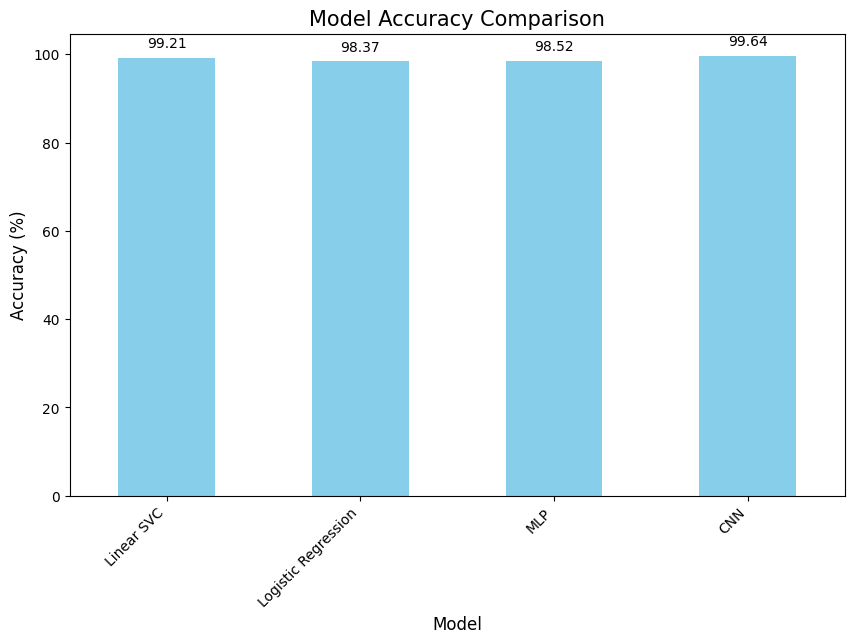

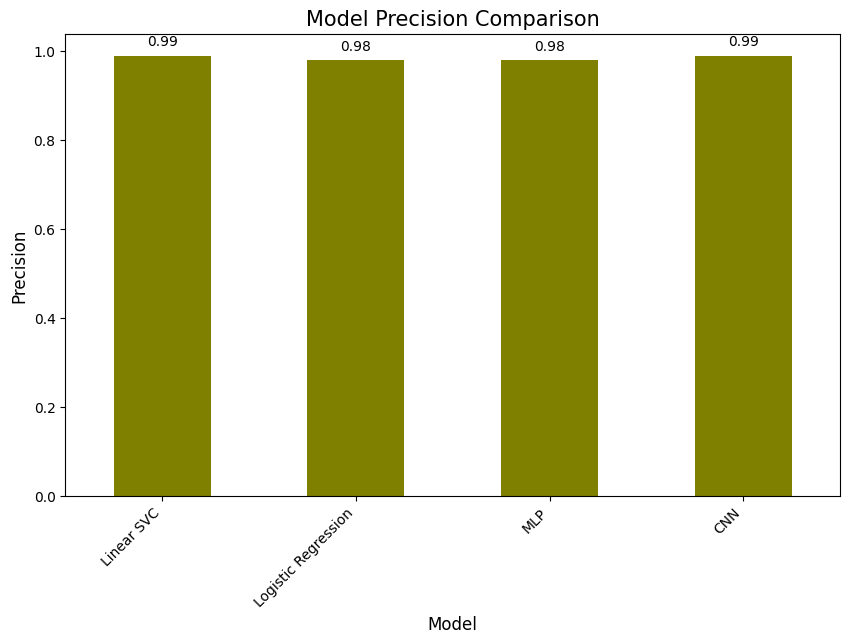

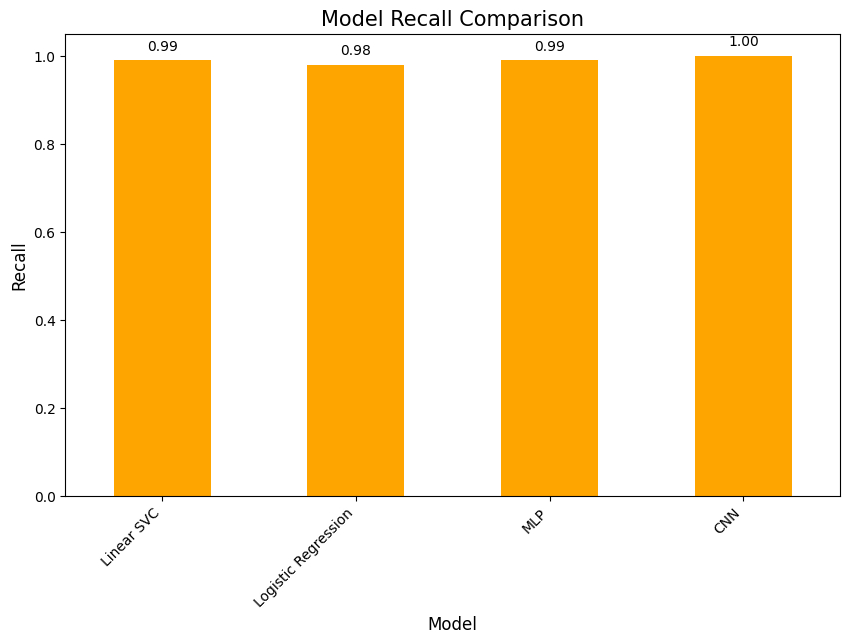

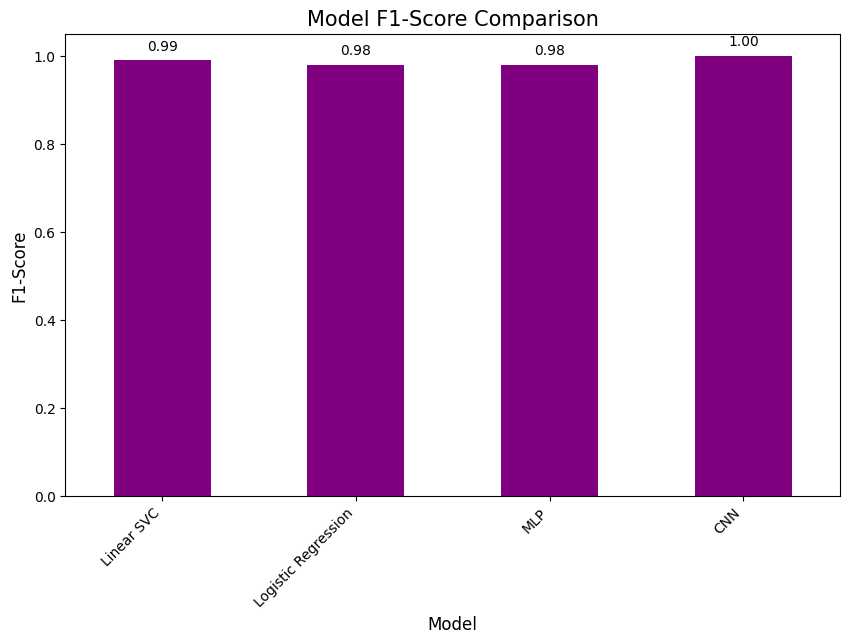

In [2]:
# Function to create a bar plot for each metric
def plot_metric(df, metric, title, ylabel, color):
    ax = df[metric].plot(kind='bar', color=color, figsize=(10, 6))
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xticklabels(df.index, rotation=45, ha="right", fontsize=10)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()

# Visualize each metric
plot_metric(df, 'Accuracy', 'Model Accuracy Comparison', 'Accuracy (%)', 'skyblue')
plot_metric(df, 'Precision', 'Model Precision Comparison', 'Precision', 'olive')
plot_metric(df, 'Recall', 'Model Recall Comparison', 'Recall', 'orange')
plot_metric(df, 'F1-Score', 'Model F1-Score Comparison', 'F1-Score', 'purple')


C:\Users\dell\AppData\Local\Temp\ipykernel_7792\2442809788.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=training_times, palette="Blues_d")


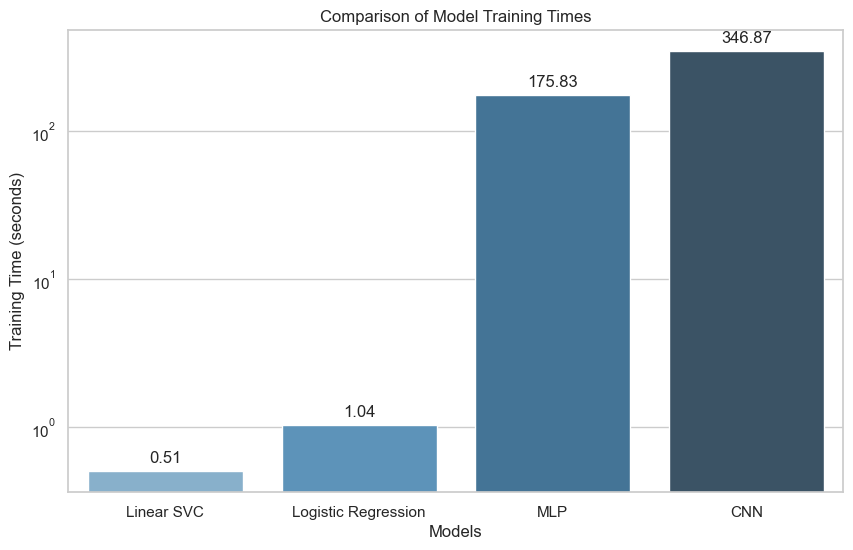

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# We have following training times in seconds
models = ['Linear SVC', 'Logistic Regression', 'MLP', 'CNN']
training_times = [0.5063, 1.0403, 175.8318, 346.87]  # Training times in seconds

# Creating the bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=models, y=training_times, palette="Blues_d")
plt.title('Comparison of Model Training Times')
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.yscale('log')  # Using a logarithmic scale for better visibility of differences

# Adding the text labels for each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()


Epoch 1/3
457/457 ━━━━━━━━━━━━━━━━━━━━ 119s 261ms/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 0.9952 - val_loss: 0.0147
Epoch 2/3
457/457 ━━━━━━━━━━━━━━━━━━━━ 121s 264ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9963 - val_loss: 0.0132
Epoch 3/3
457/457 ━━━━━━━━━━━━━━━━━━━━ 119s 259ms/step - accuracy: 0.9997 - loss: 7.9644e-04 - val_accuracy: 0.9962 - val_loss: 0.0138


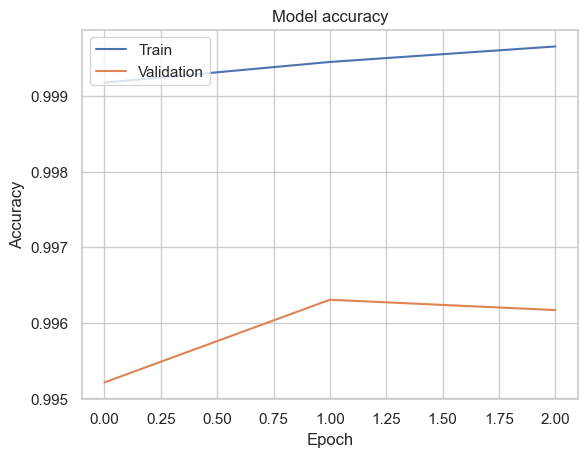

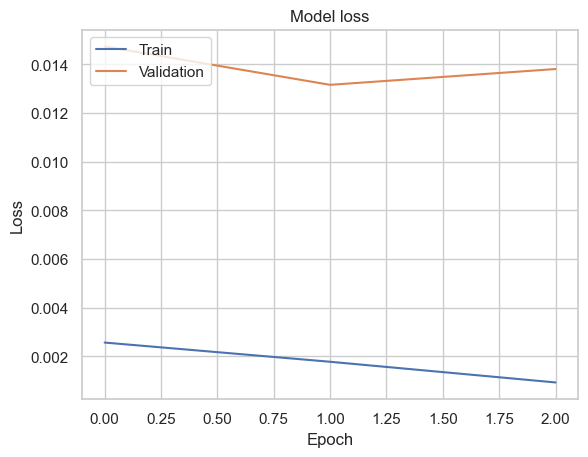

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with early stopping callback
history = cnn_model.fit(X_train, y_train, epochs=3, batch_size=64, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


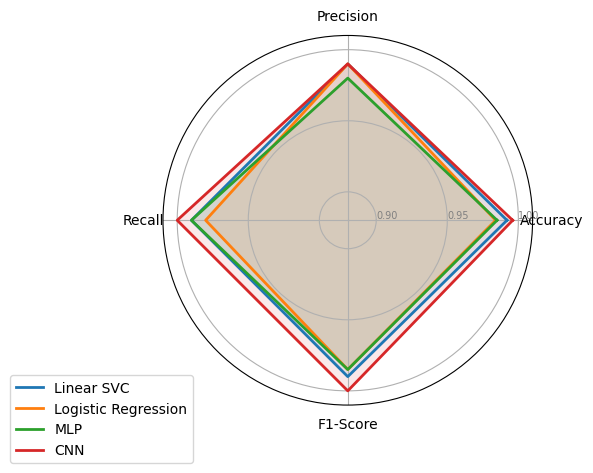

In [20]:
from math import pi
import pandas as pd

# Creating a DataFrame with the metrics for each model
metrics = pd.DataFrame({
    'metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Linear SVC': [0.992, 0.990, 0.990, 0.990],
    'Logistic Regression': [0.984, 0.990, 0.980, 0.985],
    'MLP': [0.985, 0.980, 0.990, 0.985],
    'CNN': [0.996, 0.990, 1.000, 1.000]
})

# Number of variables
categories = list(metrics['metric'])
N = len(categories)

# What will be the angle of each axis in the plot? (divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the radar plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.90, 0.95, 1.00], ["0.90", "0.95", "1.00"], color="grey", size=7)
plt.ylim(0.88,1.01)

# Plot each individual = each line of the data
# Add a line around the circle
for model in ['Linear SVC', 'Logistic Regression', 'MLP', 'CNN']:
    values = metrics[model].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)
    ax.fill(angles, values, alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


# EDA- Exploratory Data Analysis FOR ISOT DATASET

In [56]:
nested_dir = os.path.join(extract_dir, extracted_files[0])
nested_files = os.listdir(nested_dir)
nested_files


['test.csv', 'train.csv']

In [57]:
import pandas as pd

# Load the training data
train_data_path = os.path.join(nested_dir, 'train.csv')
train_data = pd.read_csv(train_data_path)

# Display the first few rows and the structure of the dataset
train_data.info(), train_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36532 entries, 0 to 36531
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text;label  36532 non-null  object
dtypes: object(1)
memory usage: 285.5+ KB


(None,
                                           text;label
 0  republican committee pass bill would prohibit ...
 1  trump treasury candidate bank accuse discrimin...
 2  guess behind sicken ad show boy bully dad vote...
 3  michigan treasurer call quick action detroit s...
 4  clinton urge renew fight value washington reut...)

In [60]:
# Load the training data with the correct delimiter
train_data = pd.read_csv(train_data_path, delimiter=';')

# Display the first few rows and the structure of the dataset again
train_data.info(), train_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36532 entries, 0 to 36531
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    36532 non-null  object
 1   label   36532 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 570.9+ KB


(None,
                                                 text  label
 0  republican committee pass bill would prohibit ...      0
 1  trump treasury candidate bank accuse discrimin...      1
 2  guess behind sicken ad show boy bully dad vote...      0
 3  michigan treasurer call quick action detroit s...      1
 4  clinton urge renew fight value washington reut...      1)

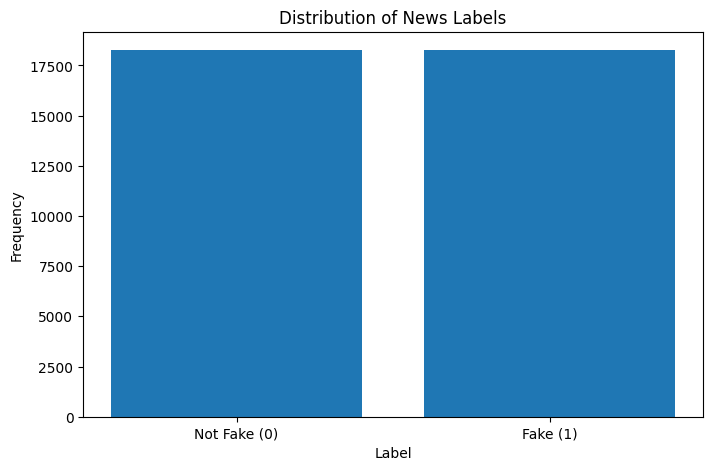

label
0    18266
1    18266
Name: count, dtype: int64

In [61]:
import matplotlib.pyplot as plt

# Plotting the distribution of labels in the dataset
label_counts = train_data['label'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(label_counts.index, label_counts.values, tick_label=['Not Fake (0)', 'Fake (1)'])
plt.title('Distribution of News Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

label_counts


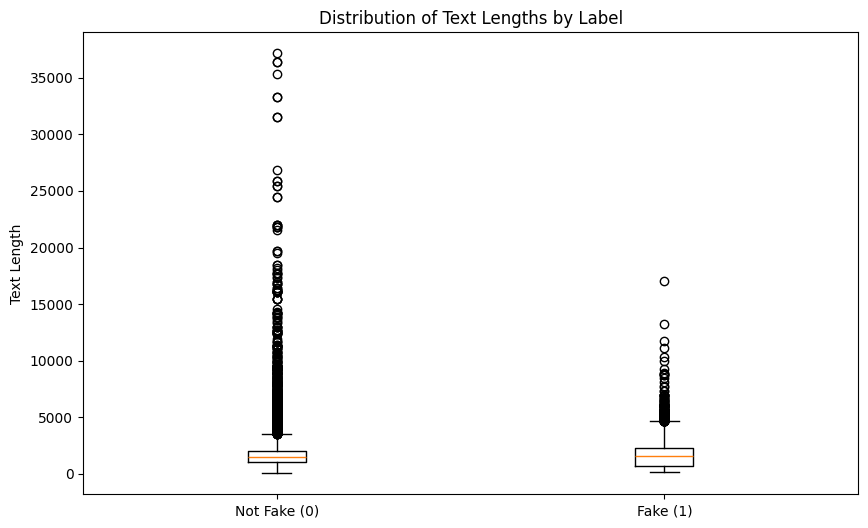

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,18266.0,1779.705080,1725.104767,43.0,1055.0,1484.0,2054.0,37168.0
1,18266.0,1683.601391,1137.916239,138.0,686.0,1566.0,2262.0,17041.0


In [62]:
# Calculate the length of each text
train_data['text_length'] = train_data['text'].apply(len)

# Display summary statistics and box plot of text lengths based on the label
summary_stats = train_data.groupby('label')['text_length'].describe()

# Plotting the text length distribution for each label
plt.figure(figsize=(10, 6))
plt.boxplot([train_data[train_data['label'] == 0]['text_length'], train_data[train_data['label'] == 1]['text_length']],
            labels=['Not Fake (0)', 'Fake (1)'])
plt.title('Distribution of Text Lengths by Label')
plt.ylabel('Text Length')
plt.show()

summary_stats


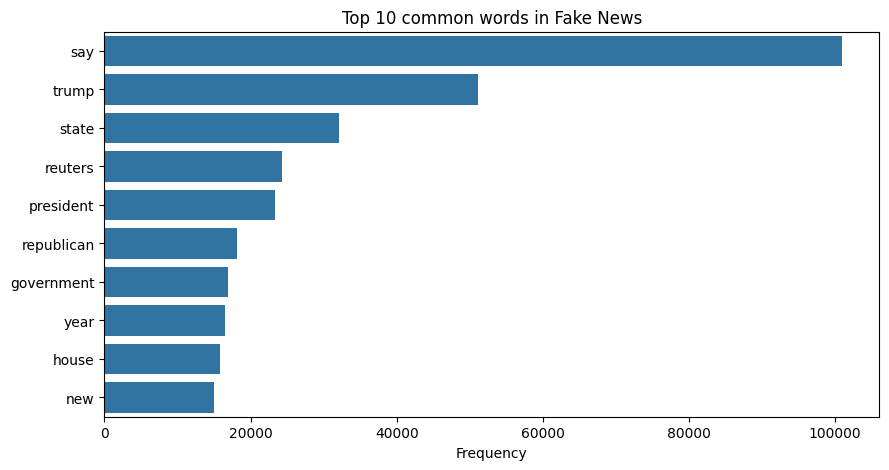

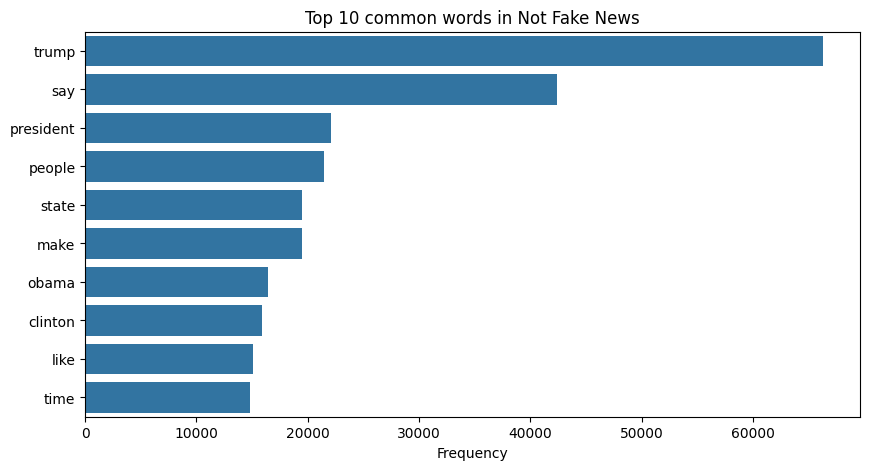

In [65]:

from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Function to plot most common words
def plot_common_words(corpus, n_features, title):
    vectorizer = CountVectorizer(stop_words='english', max_features=n_features)
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Plot
    words, counts = zip(*words_freq)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel('Frequency')

# Plotting the most common words in fake news
plot_common_words(train_data[train_data['label'] == 1]['text'], 10, 'Top 10 common words in Fake News')

# Plotting the most common words in not fake news
plot_common_words(train_data[train_data['label'] == 0]['text'], 10, 'Top 10 common words in Not Fake News')


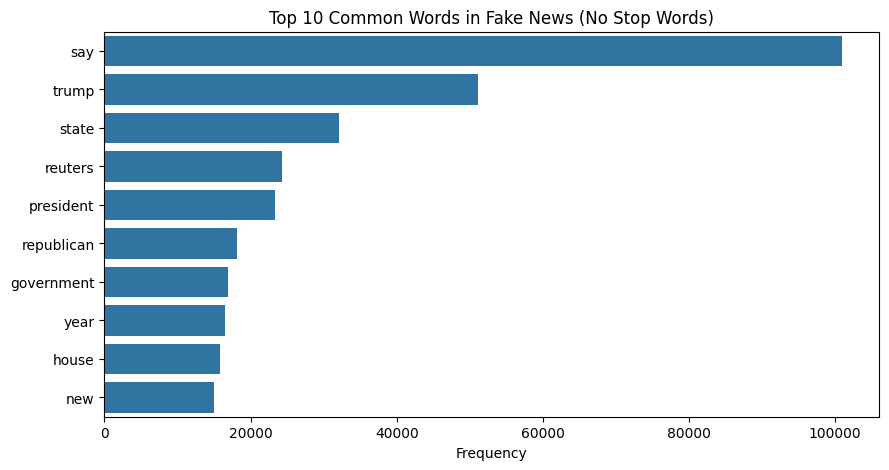

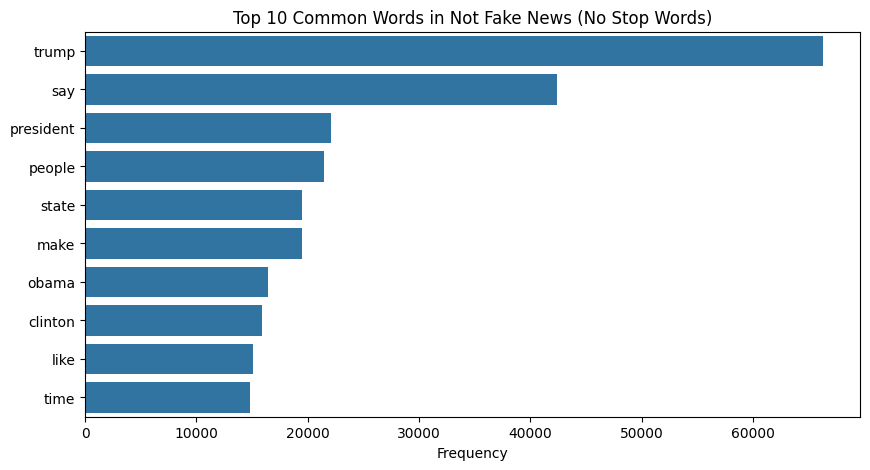

In [67]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Define a function to remove stop words
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Apply the function to remove stop words from the texts
train_data['text_no_stopwords'] = train_data['text'].apply(remove_stop_words)

# Visualizing the top 10 common words in fake news without stop words
plot_common_words(train_data[train_data['label'] == 1]['text_no_stopwords'], 10, 'Top 10 Common Words in Fake News (No Stop Words)')

# Visualizing the top 10 common words in not fake news without stop words
plot_common_words(train_data[train_data['label'] == 0]['text_no_stopwords'], 10, 'Top 10 Common Words in Not Fake News (No Stop Words)')


In [73]:
from collections import Counter

# Function to count word frequencies in the corpus
def count_word_frequencies(text_series):
    word_counts = Counter()
    for text in text_series:
        words = text.split()
        word_counts.update(words)
    return word_counts

# Count word frequencies for fake and not fake news
fake_news_words = count_word_frequencies(train_data[train_data['label'] == 1]['text_no_stopwords'])
not_fake_news_words = count_word_frequencies(train_data[train_data['label'] == 0]['text_no_stopwords'])

# Display the most common 20 words in fake news
most_common_fake = fake_news_words.most_common(20)
most_common_not_fake = not_fake_news_words.most_common(20)

most_common_fake, most_common_not_fake


([('say', 100991),
  ('trump', 51192),
  ('u', 38822),
  ('state', 32043),
  ('would', 27202),
  ('reuters', 24363),
  ('president', 23383),
  ('republican', 18147),
  ('government', 16953),
  ('year', 16477),
  ('house', 15773),
  ('new', 15055),
  ('also', 13671),
  ('party', 13108),
  ('people', 13079),
  ('official', 12829),
  ('tell', 12436),
  ('make', 12393),
  ('election', 12294),
  ('country', 12053)],
 [('trump', 66342),
  ('say', 42448),
  ('president', 22109),
  ('people', 21476),
  ('go', 19832),
  ('one', 19719),
  ('state', 19473),
  ('make', 19446),
  ('would', 19169),
  ('u', 19106),
  ('get', 17182),
  ('obama', 16440),
  ('clinton', 15876),
  ('like', 15107),
  ('time', 14822),
  ('take', 14635),
  ('donald', 14464),
  ('video', 13218),
  ('know', 12940),
  ('hillary', 12756)])

C:\Users\dell\AppData\Local\Temp\ipykernel_20108\710066906.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=fake_news_df, palette='viridis')
C:\Users\dell\AppData\Local\Temp\ipykernel_20108\710066906.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=not_fake_news_df, palette='viridis')


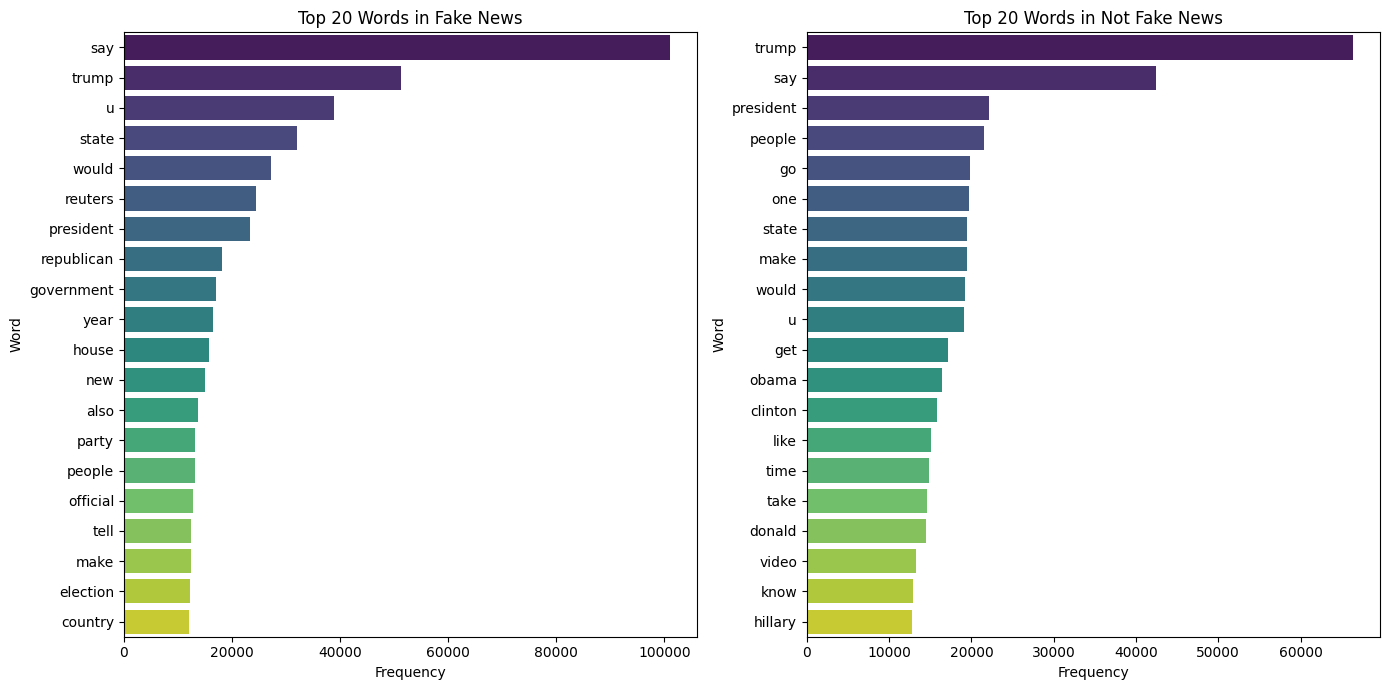

In [74]:
import pandas as pd
import seaborn as sns

# Convert the most common words to DataFrame for visualization
fake_news_df = pd.DataFrame(most_common_fake, columns=['Word', 'Frequency'])
not_fake_news_df = pd.DataFrame(most_common_not_fake, columns=['Word', 'Frequency'])

# Plotting
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=fake_news_df, palette='viridis')
plt.title('Top 20 Words in Fake News')

plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=not_fake_news_df, palette='viridis')
plt.title('Top 20 Words in Not Fake News')

plt.tight_layout()
plt.show()


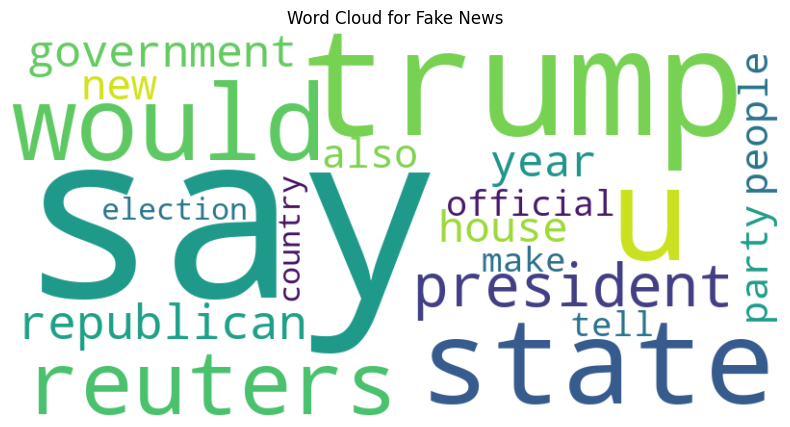

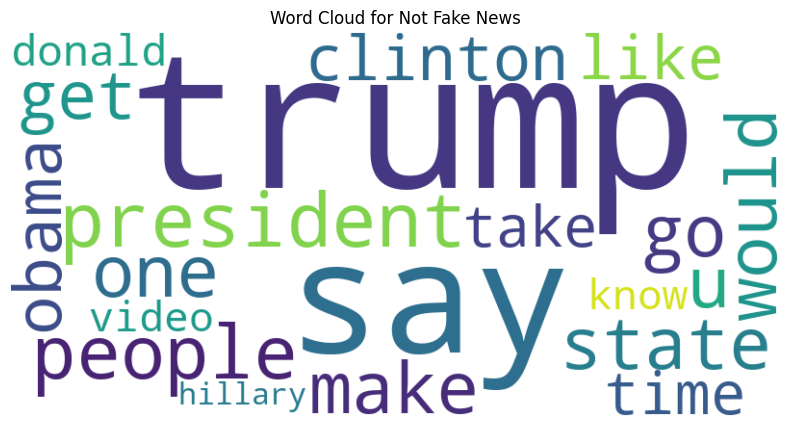

In [77]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate a word cloud
def generate_word_cloud(frequencies, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Convert word frequency list to dictionary
fake_news_dict = dict(most_common_fake)
not_fake_news_dict = dict(most_common_not_fake)

# Generate word clouds
generate_word_cloud(fake_news_dict, 'Word Cloud for Fake News')
generate_word_cloud(not_fake_news_dict, 'Word Cloud for Not Fake News')
